In [1]:
from matplotlib import pyplot as plt
import numpy as np

In [2]:
c0hf = 0.9625707
c1hf = -0.2691179
c2hf = 0.0321435
c2b1b0 = 0.1903932
c2b1b1 = 0.6809922 
c2b1b2 = 0.0000088
c2a1a0 = c2b1b0
c2a1a1 = c2b1b1
c2a1a2 = c2b1b2
c22110 = -0.0309597 
c22111 = 0.0086428
c22112 = 0.9994833
##########################################################################################################################
phi1 = np.array([1,0]).reshape((2,1))
phi2 = np.array([0, 1]).reshape((2,1))
chf = {0: c0hf, 1: c1hf, 2:  c2hf}
c2b1b = {0: c2b1b0, 1: c2b1b1, 2:  c2b1b2}
c2a1a = {0: c2a1a0, 1: c2a1a1, 2:  c2a1a2}
c2211 = {0: c22110, 1: c22111, 2:  c22112}
phi1 @ phi2.T

array([[0, 1],
       [0, 0]])

In [3]:
# tran_den_mat = {}
# for i in range(0,3):
#     for j in range(i,3):
#         tran_den_mat[str(i)+str(j)] = np.load('denmat_ci/dens_ci_'+str(i)+'_'+str(j)+'_AO.npz')['arr_0']
# tran_den_mat['10'] = tran_den_mat['01']
# tran_den_mat['20'] = tran_den_mat['02']
# tran_den_mat['21'] = tran_den_mat['12']
# tran_den_mat

In [21]:
tens = np.zeros((3,3,2,2))
for i in range(0,3):
    for j in range(0,3):
        tens [i,j,:,:] = 2 * (chf[i]*chf[j] *(phi1 @phi1.T) + (1/2)*c2a1a[i]*c2a1a[j]*(phi1 @phi1.T + phi2 @phi2.T) 
                                           +(1/2) * c2b1b[i]*c2b1b[j]*(phi1 @phi1.T + phi2 @phi2.T) + c2211[i]*c2211[j]*(phi2 @phi2.T)
                                          +(1/2) * (chf[i]*c2a1a[j] * (phi1 @ phi2.T) + c2a1a[i]*chf[j]*(phi2 @ phi1.T))
                                          -(1/2) * (chf[i]*c2b1b[j] * (phi1 @ phi2.T) + c2b1b[i]*chf[j]*(phi2 @ phi1.T))
                                          -(1/2) * (c2a1a[i]*c2211[j] * (phi1 @ phi2.T) + c2211[i]*c2a1a[j]*(phi2 @ phi1.T))
                                          +(1/2) * (c2b1b[i]*c2211[j] * (phi1 @ phi2.T) + c2211[i]*c2b1b[j]*(phi2 @ phi1.T)))
    
tens
#can compare this MO -> AO with saved Gaussian

array([[[[ 1.92558385,  0.        ],
         [ 0.        ,  0.07441615]],

        [[-0.25877744,  0.        ],
         [ 0.        ,  0.25877741]],

        [[ 0.06188413,  0.        ],
         [ 0.        , -0.06188406]]],


       [[[-0.25877744,  0.        ],
         [ 0.        ,  0.25877741]],

        [[ 1.07234964,  0.        ],
         [ 0.        ,  0.92765015]],

        [[-0.0172888 ,  0.        ],
         [ 0.        ,  0.01728865]]],


       [[[ 0.06188413,  0.        ],
         [ 0.        , -0.06188406]],

        [[-0.0172888 ,  0.        ],
         [ 0.        ,  0.01728865]],

        [[ 0.00206641,  0.        ],
         [ 0.        ,  1.99793373]]]])

In [5]:
# tens = []
# for key in tran_den_mat.keys():
#     tens.append(tran_den_mat[key])
# tens = np.array(tens).reshape(3,3,2,2)

In [6]:
full_den_mats = np.load('td_dens_tdcasscf_heh+_sto-3g_046_dt=0.082680au.npz',allow_pickle=True)
full_den_mats.files

['td_dens_im_data', 'td_dens_re_data']

In [7]:
full_den_mats = full_den_mats['td_dens_re_data'] + 1j*full_den_mats['td_dens_im_data']
full_den_mats.shape

(20073, 2, 2)

In [8]:
C = np.load('denmat_ci/ke+en+overlap+ee_twoe+dip_casscf22_heh+_sto-3g.npz')['cMO_colvec_data']
S = np.load('denmat_ci/ke+en+overlap+ee_twoe+dip_casscf22_heh+_sto-3g.npz')['overlap_data']

In [9]:
numsteps = full_den_mats.shape[0]
traces = np.einsum('ij,jk,akl,lm,mi -> a', C.T,S,full_den_mats,S,C)

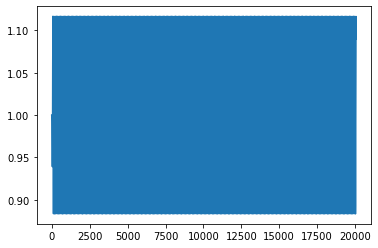

In [10]:
plt.plot(np.arange(0,numsteps), np.array(traces).real);

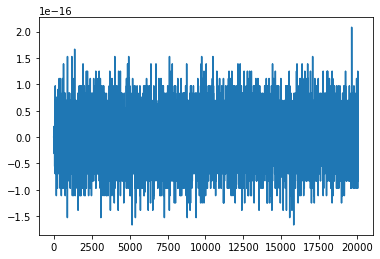

In [11]:
plt.plot(np.arange(0,numsteps), np.array(traces).imag);

In [12]:
time_coeffs = np.loadtxt('time_coeffs.tdcasscf_heh+_sto-3g_046_dt=0.082680au.txt',dtype=np.cdouble)
time_coeffs.shape

(20071, 5)

In [13]:
#deletes timestamp
time_coeffs = np.delete(time_coeffs,0,1)

In [14]:
np.sum(np.abs(np.square(time_coeffs)),axis=1)

array([1.        , 1.00000001, 0.99999999, ..., 1.        , 1.        ,
       1.        ])

In [15]:
#deletes 0 column
time_coeffs2 = np.delete(time_coeffs,1,1)
time_coeffs2
np.sum(np.abs(np.square(time_coeffs2)),axis=1)

array([1.        , 1.00000001, 0.99999999, ..., 1.        , 1.        ,
       1.        ])

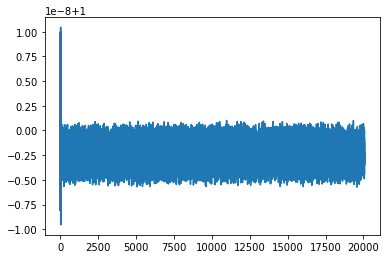

In [16]:
plt.plot(np.arange(0,time_coeffs2.shape[0]),np.sum(np.abs(np.square(time_coeffs2)),axis=1));

In [17]:
# traces = []
# for k in range(len(time_coeffs)):
#     timestep = time_coeffs2[k]
#     trace = 0
#     for den_mat in tran_den_mat.keys():
#         for i in range(0,3):
#             for j in range(i,3):
#                 trace += timestep[i] * np.conjugate(timestep[j]) *  np.trace(tran_den_mat[str(i)+str(j)])
#     traces.append(trace)
# traces = np.array(traces)
#np.min(traces),np.max(traces)

In [18]:
#plt.plot(np.arange(0,time_coeffs.shape[0]),traces);

In [26]:
#this is the training data for MMUT ()
rdmMO = np.einsum('ni,nj,ijab->nab',time_coeffs2, np.conjugate(time_coeffs2), tens)

(2.0000000124161446+2.829090043829363e-19j) (1.9999999564319597+9.24959978401696e-19j)


C:\Users\Hardeep\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


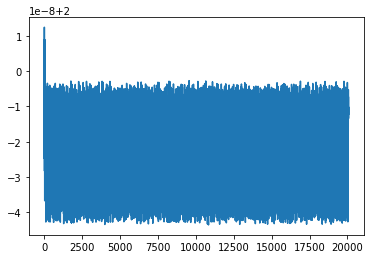

In [28]:
traces = np.einsum('ijj ->i',rdmMO)
print(np.max(traces),np.min(traces))
plt.plot(np.arange(0,time_coeffs2.shape[0]),traces);